In [1]:
from __future__ import division
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np,  matplotlib.pyplot as plt, numpy.random as npr, copy
from time import time
from pylab import plot, show, legend
from SV import *
from PF import *

In [2]:
propagate, potential = propagate_SV, potential_SV

In [3]:
x_0 = np.asarray([0])
theta = [0.9, 0.25, 0.1]
T = 1_000
y, X = simulate_data_SV(theta, x_0, T)
data = dict(x_0=x_0, y=y)
def test_fn(x) : return x

100%|██████████| 1000/1000 [00:00<00:00, 2946.11it/s]


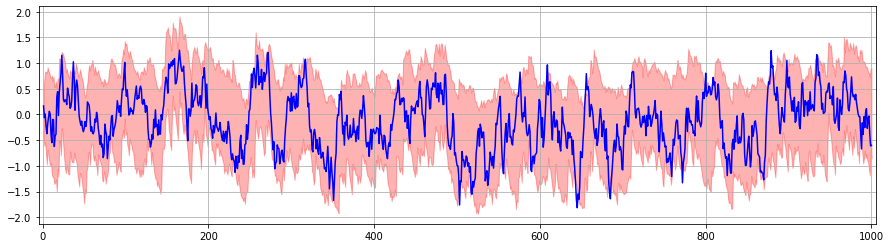

In [4]:
S = 10
N = 2**S
log_NC_bpf, _, particles_bpf = bootstrap_PF(data, theta, potential, propagate, test_fn, N, store_paths=True)
plt.rcParams['figure.figsize'] = (15.0, 4.0)
CI = np.percentile(particles_bpf[:,:T,0],q=[2.5,97.5],axis=0)
plt.fill_between(np.arange(1,T+1), CI[0], CI[1], alpha=0.3, color="red")
plt.grid(True)
plt.plot(np.arange(1,T+1), X[1:], "blue");
plt.xlim([-5,T+5]);

### AIRPF:

In [5]:
A = np.zeros((S,N,N))
for s in range(S) :
    A[s] = np.kron(np.kron(np.eye(2**(S-(s+1))),np.ones((2,2))/2),np.eye(2**s))

100%|██████████| 1000/1000 [01:24<00:00, 11.84it/s]


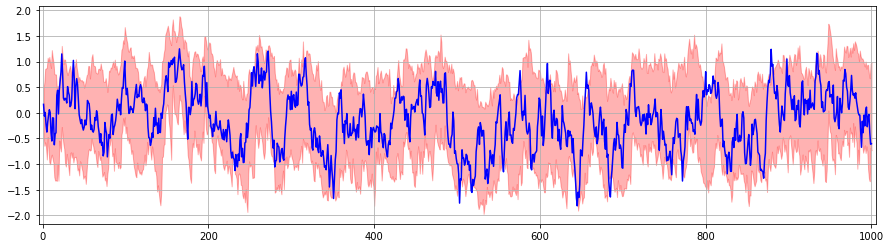

In [6]:
log_NC_airpf, _, particles_airpf = AIRPF(data, theta, potential, propagate, test_fn, A, store_paths=True)
plt.rcParams['figure.figsize'] = (15.0, 4.0)
CI = np.percentile(particles_airpf[:,:T,0],q=[2.5,97.5],axis=0)
plt.fill_between(np.arange(1,T+1), CI[0], CI[1], alpha=0.3, color="red")
plt.grid(True)
plt.plot(np.arange(1,T+1), X[1:], "blue")
plt.xlim([-5,T+5]);

In [7]:
log_NC_bpf[-1], log_NC_airpf[-1]

(956.314757699072, 954.6843074881523)